In [1]:
# Import Libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

df = pd.read_csv('baseSemNulls.csv')

In [2]:
# INfo dados
print("INFO Dataset: ", df.shape)

INFO Dataset:  (58090, 16)


In [3]:
### Seperar Target e Source
x = df.values[:,0:15]
y = df.values[:,15]

In [4]:
### Split the TEST_data and TRAIN_data
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3, random_state= 100)

In [5]:
#### Find Best KNN 
scores = []
axis = []
best = [0,0]
i = 1
while i <= 100:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    scor = accuracy_score(y_test,predict)*100
    scores.append(scor)
    axis.append(i)
    
    if scor > best[1]:
        best[1] = scor
        best[0] = i
    
    i = i + 1

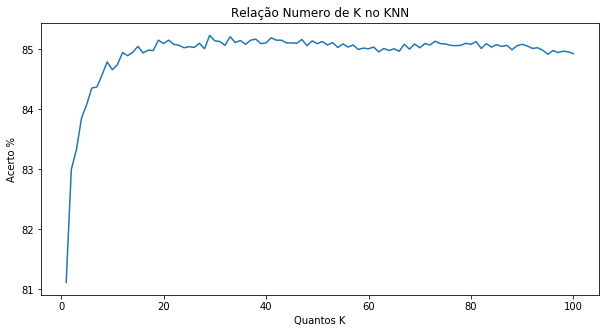

O melhor K é 29 Com Precisão de 85.23555402536294


In [6]:
fig, ax = plt.subplots()
ax.plot(axis, scores)
ax.set_xlabel("Quantos K")
ax.set_ylabel("Acerto %")
ax.set_title("Relação Numero de K no KNN")
fig.set_size_inches(10, 5)
plt.show()
print ("O melhor K é " + str(best[0]) + " Com Precisão de " +  str(best[1]))

In [7]:
# Best KNN
knn = KNeighborsClassifier(n_neighbors=best[0])
knn.fit(x_train,y_train)
predict = knn.predict(x_test)

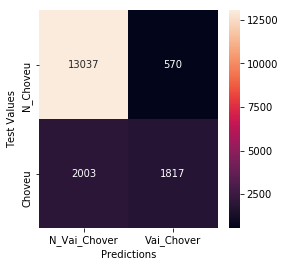

In [8]:
# Matriz de Confusão
cm = confusion_matrix(y_test,predict)

cm_df = pd.DataFrame(cm,
                     index = ['N_Choveu','Choveu'], 
                     columns = ['N_Vai_Chover','Vai_Chover'])


f, ax = plt.subplots(figsize = (4,4))
sns.heatmap(cm_df,annot=True,linecolor="blue",fmt=".0f",ax=ax)
plt.xlabel("Predictions")
plt.ylabel("Test Values")
plt.show()


In [9]:
kf = KFold(n_splits=3)
total = 0
KNNlist = []
for train_index , test_index in kf.split(df):
    x_train, x_test, y_train , y_test = x[train_index], x[test_index] , y[train_index] , y[test_index]
    
    knn = KNeighborsClassifier(n_neighbors=best[0])
    knn.fit(x_train,y_train)
    predict = knn.predict(x_test)
    KNNlist.append(accuracy_score(y_test,predict)*100)
    total = total + (accuracy_score(y_test,predict)*100)

total = total / 3

In [10]:
# KFold  Results
print('VALORES KFOLD :' ,KNNlist)
print('Precisão Media :', total)

VALORES KFOLD : [83.3660400743648, 83.97975520322264, 86.53617724526158]
Precisão Media : 84.627324174283
